In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
from skimage.measure import label
from PIL import Image
from scipy.ndimage import gaussian_filter
from sklearn.feature_extraction import image as skimage
from sklearn.cluster import spectral_clustering
from scipy import ndimage as ndi
from sklearn.feature_extraction.image import grid_to_graph
from sklearn.cluster import AgglomerativeClustering
from skimage.segmentation import flood, flood_fill
from sklearn.cluster import MeanShift, estimate_bandwidth
from skimage.feature import peak_local_max
from skimage.metrics import adapted_rand_error, variation_of_information
from skimage.segmentation import watershed

# 1 Завантажити зображення згідно варіанту

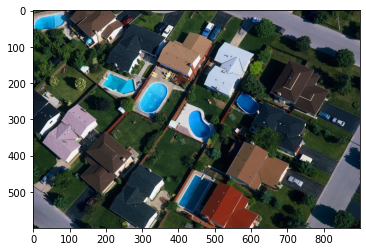

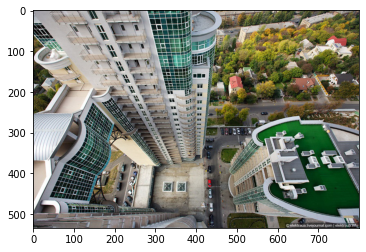

In [2]:
image1 = np.array(Image.open(r'/content/8_крыши.jpg'))
plt.imshow(image1)
plt.show()
image2 = np.array(Image.open(r'/content/8_крыши 2.jpg'))
plt.imshow(image2)
plt.show()
pre_image1, pre_image2 = image1, image2

# 2 Визначити методи, що будуть використовуватися для попередньої обробки зображень, таблиця 3.1. Провести подальші експерименти з різними методами (або комбінацією).

## Skimage.measure.label
размечивает входной массив, если пиксели являються соседями(имеют одно значение то есть метка, иначе метки нет)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


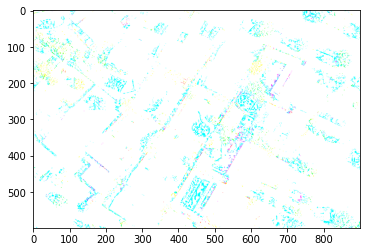

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


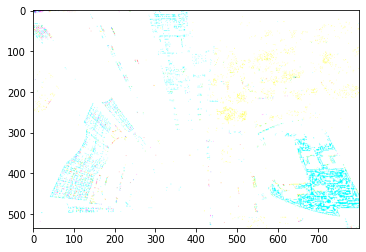

In [ ]:
pre_image1 = label(image1)
pre_image2 = label(image2)
plt.imshow(pre_image1)
plt.show()
plt.imshow(pre_image2)
plt.show()

## Erode
Размытие

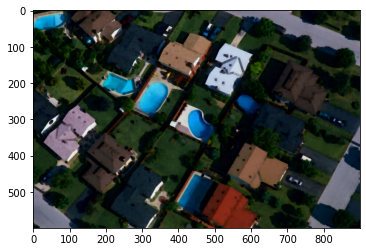

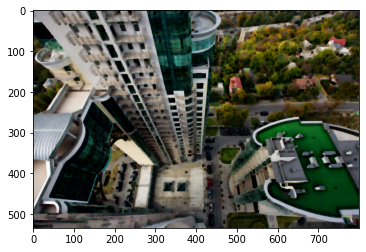

In [3]:
pre_image1 = cv2.erode(image1,np.ones((3, 3), np.uint8), iterations=2)
pre_image2 = cv2.erode(image2,np.ones((3, 3), np.uint8), iterations=2)
plt.imshow(pre_image1)
plt.show()
plt.imshow(pre_image2)
plt.show()

## Gaussian_filter
гаусовское размытие

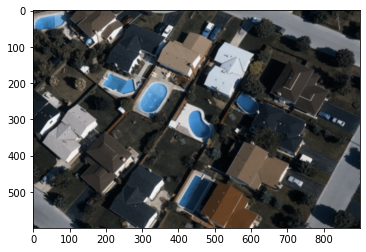

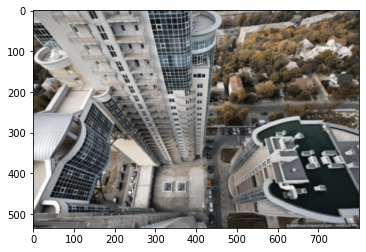

In [30]:
pre_image1 = gaussian_filter(image1, sigma=1)
pre_image2 = gaussian_filter(image2,sigma=1)
plt.imshow(pre_image1)
plt.show()
plt.imshow(pre_image2)
plt.show()

## Mix Erode(Gaussian filter)

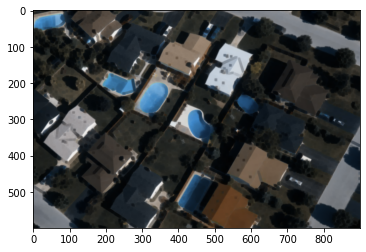

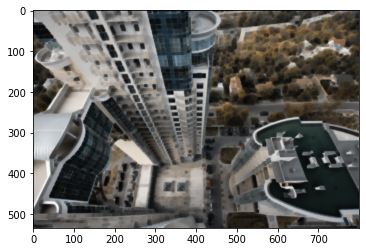

In [ ]:
gauss_image1 = gaussian_filter(image1, sigma=1)
gauss_image2 = gaussian_filter(image2,sigma=1)
pre_image1 = cv2.erode(gauss_image1,np.ones((3, 3), np.uint8), iterations=2)
pre_image2 = cv2.erode(gauss_image2,np.ones((3, 3), np.uint8), iterations=2)
plt.imshow(pre_image1)
plt.show()
plt.imshow(pre_image2)
plt.show()

## Dilate
расширение обратное к erode

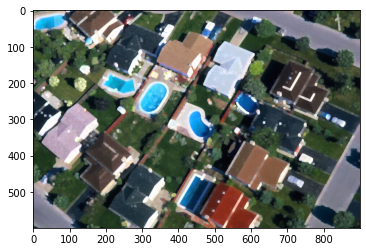

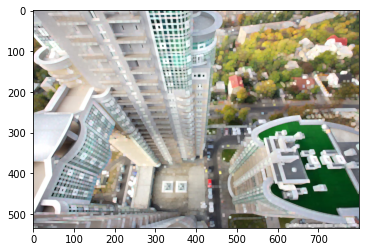

In [ ]:
pre_image1 = cv2.dilate(image1,np.ones((3, 3), np.uint8), iterations=2)
pre_image2 = cv2.dilate(image2,np.ones((3, 3), np.uint8), iterations=2)
plt.imshow(pre_image1)
plt.show()
plt.imshow(pre_image2)
plt.show()

## Mix Dilate(Gaussian filter)


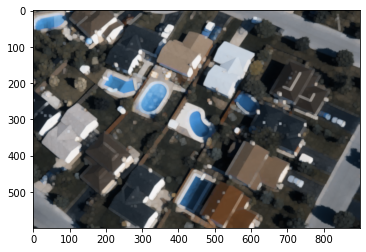

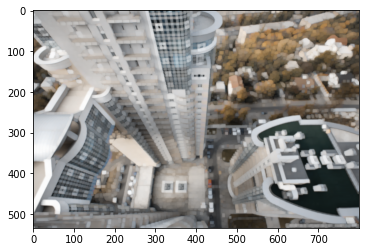

In [ ]:
gauss_image1 = gaussian_filter(image1, sigma=1)
gauss_image2 = gaussian_filter(image2,sigma=1)
pre_image1 = cv2.dilate(gauss_image1,np.ones((3, 3), np.uint8), iterations=2)
pre_image2 = cv2.dilate(gauss_image2,np.ones((3, 3), np.uint8), iterations=2)
plt.imshow(pre_image1)
plt.show()
plt.imshow(pre_image2)
plt.show()

## morphologyEx
0 - erode

1 - dilate

2 - dst=open(src,element)=dilate(erode(src,element))

3 - dst=close(src,element)=erode(dilate(src,element))

4 - dst=morph_grad(src,element)=dilate(src,element)−erode(src,element)

5 - dst=tophat(src,element)=src−open(src,element)

6 - dst=blackhat(src,element)=close(src,element)−src

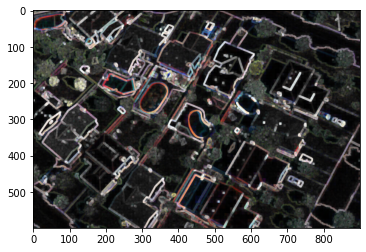

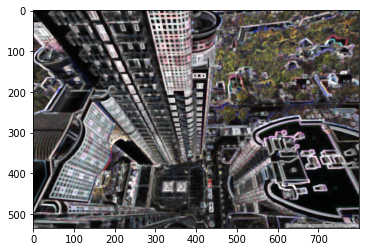

In [28]:
def option_morphEx(option):
  pre_image1 = cv2.morphologyEx(image1,option,np.ones((3, 3), np.uint8), iterations=2)
  pre_image2 = cv2.morphologyEx(image2,option,np.ones((3, 3), np.uint8), iterations=2)
  plt.imshow(pre_image1)
  plt.show()
  plt.imshow(pre_image2)
  plt.show()
  return pre_image1, pre_image2
pre_image1, pre_image2 = option_morphEx(4)

## Thresholding
cv2.THRESH_BINARY

cv2.THRESH_BINARY_INV

cv2.THRESH_TRUNC

cv2.THRESH_TOZERO

cv2.THRESH_TOZERO_INV

Здесь все просто. Для каждого пикселя применяется одно и то же пороговое значение. Если значение пикселя меньше порогового значения, оно устанавливается на 0, в противном случае устанавливается на максимальное значение. Функция cv.threshold используется для определения порога. Первый аргумент - это исходное изображение, которое должно быть изображением в градациях серого. Второй аргумент - это пороговое значение, которое используется для классификации значений пикселей. Третий аргумент - это максимальное значение, которое присваивается значениям пикселей, превышающим пороговое значение. OpenCV предоставляет различные типы пороговых значений, которые задаются четвертым параметром функции. Базовая установка пороговых значений, как описано выше, выполняется с использованием типа cv.THRESH_BINARY

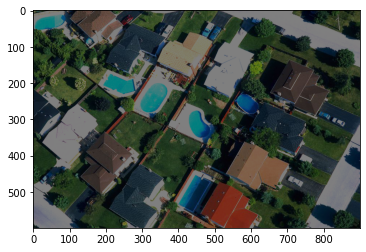

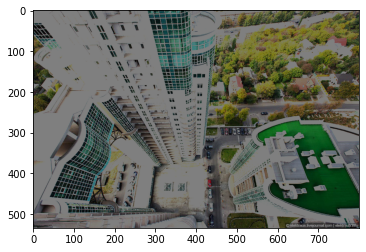

In [ ]:
def trunc(meth):  
  pre_image1 = cv2.threshold(image1,127, 255, meth)[1]
  pre_image2 = cv2.threshold(image2,127, 255, meth)[1]
  plt.imshow(pre_image1)
  plt.show()
  plt.imshow(pre_image2)
  plt.show()
  return pre_image1, pre_image2
pre_image1, pre_image2 = trunc(cv2.THRESH_TRUNC)

## Otsu's Binarization
метод Оцу избегает необходимости выбирать значение и определяет его автоматически. Хороший порог находится посередине этих двух значений. Точно так же метод Оцу определяет оптимальное глобальное пороговое значение из гистограммы изображения.Для этого используется функция cv.threshold (), где cv.THRESH_OTSU передается как дополнительный флаг. Пороговое значение можно выбрать произвольно. Затем алгоритм находит оптимальное пороговое значение, которое возвращается в качестве первого вывода.


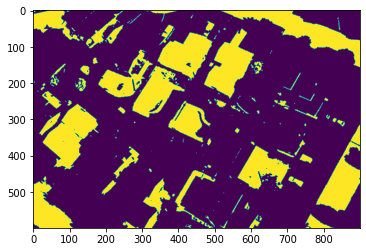

threshold =  95.0


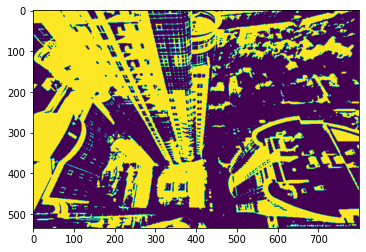

threshold =  123.0


In [21]:
def otsu(meth,gauss_flag = False):
  img1_grey = cv2.cvtColor(image1, cv2.COLOR_RGB2GRAY)
  img2_grey = cv2.cvtColor(image2, cv2.COLOR_RGB2GRAY)
  if gauss_flag:
    img1_grey = cv2.GaussianBlur(img1_grey,(5,5),0)
    img2_grey = cv2.GaussianBlur(img2_grey,(5,5),0)
  pre_image1 = cv2.threshold(img1_grey,0,255,meth)[1]
  pre_image2 = cv2.threshold(img2_grey,0,255,meth)[1]
  plt.imshow(pre_image1)
  plt.show()
  print("threshold = ",cv2.threshold(img1_grey,0,255,meth)[0])
  plt.imshow(pre_image2)
  plt.show()
  print("threshold = ",cv2.threshold(img2_grey,0,255,meth)[0])
  return pre_image1, pre_image2 
pre_image1, pre_image2 = otsu(cv2.THRESH_OTSU,gauss_flag = True)

# 3 По черзі застосувати наступні методи сегментації

##Spectral clustering

In [61]:
def spectr_clustering(image, n_clusters):
  image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
  image = cv2.resize(image, dsize=(100, 100))
  mask = image.astype(bool)
  image = image.astype(float)/255

  graph = skimage.img_to_graph(image, mask=mask)
  graph.data = np.exp(-graph.data / graph.data.std())

  labels = spectral_clustering(graph, n_clusters=n_clusters, eigen_solver='arpack')
  label_im = np.full(mask.shape, 0)
  label_im[mask] = (np.asarray(labels) + 1)

  plt.imshow(image,cmap='gray') 
  image = (image*255).astype(int)
  plt.matshow(label_im)
    
  label_im = label_im.astype(int)
  return adapted_rand_error(image, label_im), variation_of_information(image, label_im)

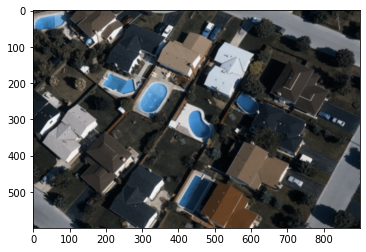

In [62]:
plt.imshow(pre_image1)
plt.show()

In [63]:
df = pd.DataFrame()

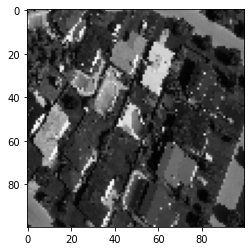

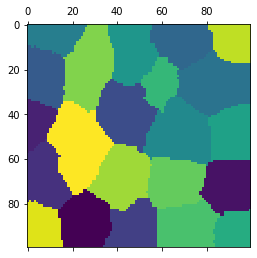

In [64]:
i = 0
n_clusters=22
are_, voi = spectr_clustering(image1, n_clusters)
are, prec, rec = are_
v1, v1_ = voi
df.loc[i, 'name'] = 'spectr_clustering'
df.loc[i, 'are'] = are
df.loc[i, 'prec'] = prec
df.loc[i, 'rec'] = rec
df.loc[i, 'v1'] = v1
df.loc[i, 'v1_'] = v1_
df.head()
i += 1

In [65]:
df

name       are      prec       rec        v1       v1_
0  spectr_clustering  0.978295  0.078478  0.012594  3.568303  6.500946

## Agglomerative

In [66]:
def agglomerative(image):
  img = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
  img = cv2.resize(img, dsize=(100, 100))
  im_shape = img.shape
  image = np.reshape(img, (-1, 1))
  connectivity = grid_to_graph(*image.shape)
  ward = AgglomerativeClustering(n_clusters=4, 
                                 linkage='ward', 
                                 connectivity=connectivity).fit(image)

  
  label = np.reshape(ward.labels_, im_shape)
  plt.figure(figsize=(5, 5))
  plt.imshow(img, cmap=plt.cm.gray)
  for l in range(4):
    plt.contour(label == l, contours=1)
  plt.xticks(())
  plt.yticks(())
  plt.show()
  img = (img*255).astype(int)
  label = (label*255).astype(int)
  return adapted_rand_error(img, label), variation_of_information(img, label)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: The following kwargs were not used by contour: 'contours'
  app.launch_new_instance()


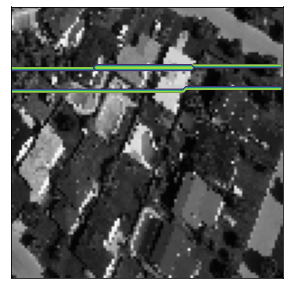

In [76]:
i = 1
are_, voi = agglomerative(image1)
are, prec, rec = are_
v1, v1_ = voi
df.loc[i, 'name'] = 'agglomerative'
df.loc[i, 'are'] = are
df.loc[i, 'prec'] = prec
df.loc[i, 'rec'] = rec
df.loc[i, 'v1'] = v1
df.loc[i, 'v1_'] = v1_
df.head()
i += 1

In [77]:
df

name       are      prec       rec        v1       v1_
0  spectr_clustering  0.978295  0.078478  0.012594  3.568303  6.500946
1      agglomerative  0.983104  0.573172  0.008574  1.072816  7.219720
3            k_means  0.966943  0.265400  0.017626  2.028023  6.171355
4            grabcut  0.973235  0.549663  0.013716  0.908153  3.326887
5          floodfill  0.000004  0.999995  0.999996  0.000045  0.000043
6          floodfill  0.000006  0.999992  0.999996  0.000048  0.000044

## Mean Shift

In [ ]:
def mean_shift(image):
  X=np.reshape(image.astype(float)/255,(image.shape[0]*image.shape[1],image.shape[2]))
  mask = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY).astype(bool)
  model = MeanShift(bandwidth=estimate_bandwidth(X),bin_seeding = True, min_bin_freq = 5, max_iter = 100)
  labels=model.fit(X).labels_

  label_im = np.full(mask.shape, 0)
  label_im[mask] = (np.asarray(labels) + 1)
  plt.imshow(image) 
  plt.matshow(label_im)
  
  image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
  label_im = label_im.astype(int)
  return adapted_rand_error(image, label_im), variation_of_information(image, label_im)

In [ ]:
i = 2
are_, voi = mean_shift(image1)
are, prec, rec = are_
v1, v1_ = voi
df.loc[i, 'name'] = 'mean_shift'
df.loc[i, 'are'] = are
df.loc[i, 'prec'] = prec
df.loc[i, 'rec'] = rec
df.loc[i, 'v1'] = v1
df.loc[i, 'v1_'] = v1_
df.head()
i += 1

## K_means
Квантування кольору – це процес зменшення кількості кольорів у зображенні. Однією з причин для цього є зменшення пам’яті. Іноді деякі пристрої можуть мати такі обмеження, що вони можуть відтворювати лише обмежену кількість кольорів. У цих випадках також виконується квантування кольору. Тут ми використовуємо кластеризацію k-середніх для квантування кольору.

In [69]:
def k_means(img):
  vectorized = img.reshape((-1,3))
  vectorized = np.float32(vectorized)
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
  K = 4
  attempts=10
  ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
  center = np.uint8(center)
  res = center[label.flatten()]
  result_image = res.reshape((img.shape))
  figure_size = 15
  plt.figure(figsize=(figure_size,figure_size))
  plt.subplot(1,2,1),plt.imshow(img)
  plt.title('Original Image'), plt.xticks([]), plt.yticks([])
  plt.subplot(1,2,2),plt.imshow(result_image)
  plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])
  plt.show()
  img = (img*255).astype(int)
  label = (result_image*255).astype(int)
  return adapted_rand_error(img, label), variation_of_information(img, label)

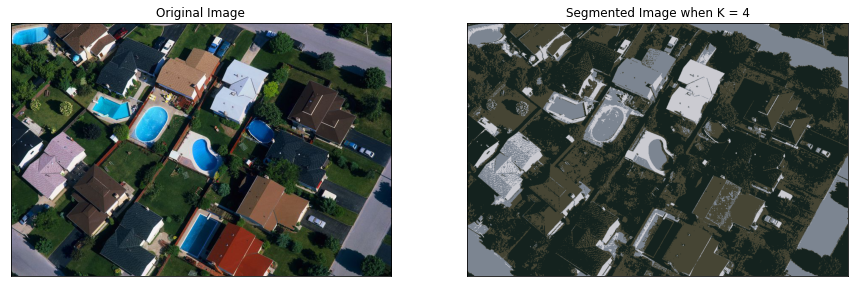

In [70]:
i = 3
are_, voi = k_means(image1)
are, prec, rec = are_
v1, v1_ = voi
df.loc[i, 'name'] = 'k_means'
df.loc[i, 'are'] = are
df.loc[i, 'prec'] = prec
df.loc[i, 'rec'] = rec
df.loc[i, 'v1'] = v1
df.loc[i, 'v1_'] = v1_
df.head()
i += 1

In [71]:
df

name       are      prec       rec        v1       v1_
0  spectr_clustering  0.978295  0.078478  0.012594  3.568303  6.500946
1      agglomerative  0.983104  0.573172  0.008574  1.072816  7.219720
3            k_means  0.966943  0.265400  0.017626  2.028023  6.171355

## Grabcut
Починаючи з визначеної користувачем обмежувальної рамки навколо об’єкта, який потрібно сегментувати, алгоритм оцінює розподіл кольору цільового об’єкта та фону за допомогою моделі суміші Гаусса. Це використовується для побудови випадкового поля Маркова над мітками пікселів з функцією енергії, яка віддає перевагу пов’язаним регіонам, що мають однакову мітку, і виконує оптимізацію на основі розрізу графіка для визначення їх значень. Оскільки ця оцінка, ймовірно, буде точнішою, ніж оригінал, взятий з обмежувальної рамки, ця двоетапна процедура повторюється до зближення.

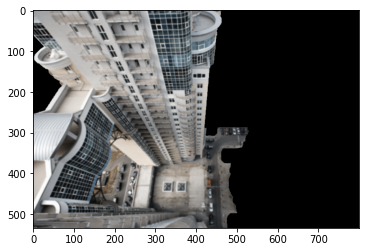

In [72]:
def grabcut(img_orig, rect_final): 
    mask = np.zeros(img_orig.shape[:2],np.uint8) 
 
    x,y,w,h = rect_final 
    mask[y:y+h, x:x+w] = 1 

    bgdModel = np.zeros((1,65), np.float64) 
    fgdModel = np.zeros((1,65), np.float64) 
    cv2.grabCut(img_orig, mask, rect_final, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT) 
 
    mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8') 
    img_orig_ = img_orig*mask2[:,:,np.newaxis] 
 
    plt.imshow(img_orig_) 
    img = (img_orig*255).astype(int)
    label = (img_orig_*255).astype(int)
    return adapted_rand_error(img, label), variation_of_information(img, label)

rect = (0, 0, pre_image2.shape[0], pre_image2.shape[1])
are_, voi = grabcut(pre_image2, rect)
are, prec, rec = are_
v1, v1_ = voi
df.loc[i, 'name'] = 'grabcut'
df.loc[i, 'are'] = are
df.loc[i, 'prec'] = prec
df.loc[i, 'rec'] = rec
df.loc[i, 'v1'] = v1
df.loc[i, 'v1_'] = v1_
df.head()
i += 1

##Floodfill
Починаючи з певної початкової_точки, з’єднані точки, рівні або в межах допуску початкового значення, виявляються, а потім встановлюється на нове_значення.

(599, 900)


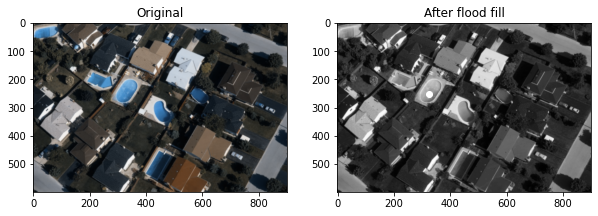

In [74]:
def floodfill(img):
  image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  print(image.shape)
  filled_img = flood_fill(image, (325, 250), 127)

  fig, ax = plt.subplots(ncols=2, figsize=(10, 5))

  ax[0].imshow(img, cmap=plt.cm.gray)
  ax[0].set_title('Original')

  ax[1].imshow(filled_img, cmap=plt.cm.gray)
  ax[1].plot(325, 250, 'wo')  # seed point
  ax[1].set_title('After flood fill')

  plt.show()
  img = (image*255).astype(int)
  label = (filled_img*255).astype(int)

  return adapted_rand_error(img, label), variation_of_information(img, label)

are_, voi = floodfill(pre_image1)
are, prec, rec = are_
v1, v1_ = voi
df.loc[i, 'name'] = 'floodfill'
df.loc[i, 'are'] = are
df.loc[i, 'prec'] = prec
df.loc[i, 'rec'] = rec
df.loc[i, 'v1'] = v1
df.loc[i, 'v1_'] = v1_
df.head()
i += 1

##Waterwashed

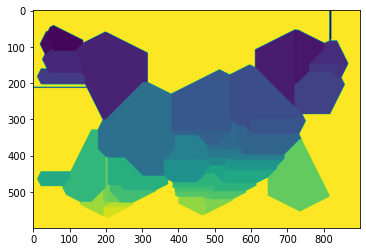

name       are      prec       rec        v1       v1_
0  spectr_clustering  0.978295  0.078478  0.012594  3.568303  6.500946
1      agglomerative  0.983104  0.573172  0.008574  1.072816  7.219720
3            k_means  0.966943  0.265400  0.017626  2.028023  6.171355
4            grabcut  0.973235  0.549663  0.013716  0.908153  3.326887
5          floodfill  0.000004  0.999995  0.999996  0.000045  0.000043
6         watershed_  0.982525  0.215359  0.009107  3.172079  6.804297

In [81]:
def watershed_(image):
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  thresh = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY)[1]
  distance = ndi.distance_transform_edt(thresh)
  coords = peak_local_max(distance, footprint=np.ones((3, 3)), labels=image)
  mask = np.zeros(distance.shape, dtype=bool)
  mask[tuple(coords.T)] = True
  markers, _ = ndi.label(mask)
  labels = watershed(-distance, markers, mask=image)
  plt.imshow(labels)
  plt.show()

  img = (image*255).astype(int)
  label = (labels*255).astype(int)

  return adapted_rand_error(img, label), variation_of_information(img, label)

i=6
are_, voi = watershed_(pre_image1)
are, prec, rec = are_
v1, v1_ = voi
df.loc[i, 'name'] = 'watershed_'
df.loc[i, 'are'] = are
df.loc[i, 'prec'] = prec
df.loc[i, 'rec'] = rec
df.loc[i, 'v1'] = v1
df.loc[i, 'v1_'] = v1_
df